In [1]:
{-# LANGUAGE MonadComprehensions, RebindableSyntax #-}
import Language.Stochaskell
stochaskell

Stochaskell, version 0.1.0
Copyright (C) 2015-2019 David A Roberts
This program comes with ABSOLUTELY NO WARRANTY.
This is free software, and you are welcome to redistribute it
under certain conditions; see the LICENSE for details.

Using installation directory at 
  /home/jovyan/stochaskell

In [2]:
covPrior :: Z -> P RMat
covPrior n = do
  tau <- joint vector [ truncated 0 infinity (cauchy 0 2.5) | i <- 1...n ]
  corr <- corrLKJ 2 (1,n)
  return (qfDiag corr tau)

In [3]:
birats :: Z -> Z -> P (RVec,RVec,RMat,RMat,R,RMat)
birats n t = do
  x <- uniforms (vector [ 0 | j <- 1...t ]) (vector [ 50 | j <- 1...t ])
  betaMu <- normals (vector [ 0 | _ <- 1...2 ]) (vector [ 100 | _ <- 1...2 ])
  betaSigma <- covPrior 2
  beta <- normalsChol n 2 betaMu betaSigma
  let beta' = tr' beta
      yMu = asColumn (beta'!1) + outer (beta'!2) x
  ySigma <- truncated 0 infinity (cauchy 0 2.5)
  y <- normals yMu (matrix [ ySigma | i <- 1...n, j <- 1...t ])
  return (x,betaMu,betaSigma,beta,ySigma,y)

In [4]:
:opt svg
import Language.Stochaskell.Plot

rejecting OOB sample -3.0211867938117805
rejecting OOB sample -6.9251262844039
rejecting OOB sample -13.073243189832711
rejecting OOB sample -138.31103267470144
rejecting OOB sample -4.257210070571588

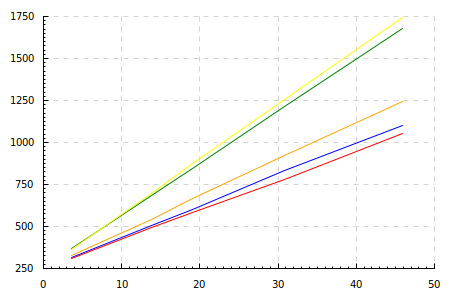

In [5]:
(x,betaMu,betaSigma,beta,ySigma,ys) <- simulate (birats 5 5)
toRenderable $ sequence_ [plot $ line "" [sort $ list x `zip` y] | y <- list ys :: [[Double]]]